In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from PIL import Image
import pytesseract

import statistics

In [2]:
a = cv.imread('a.jpg')
a = cv.cvtColor(a, cv.COLOR_RGBA2GRAY)
b = cv.imread('b.jpg')
b = cv.cvtColor(b, cv.COLOR_RGBA2GRAY)
c = cv.imread('c.jpg')
c = cv.cvtColor(c, cv.COLOR_RGBA2GRAY)

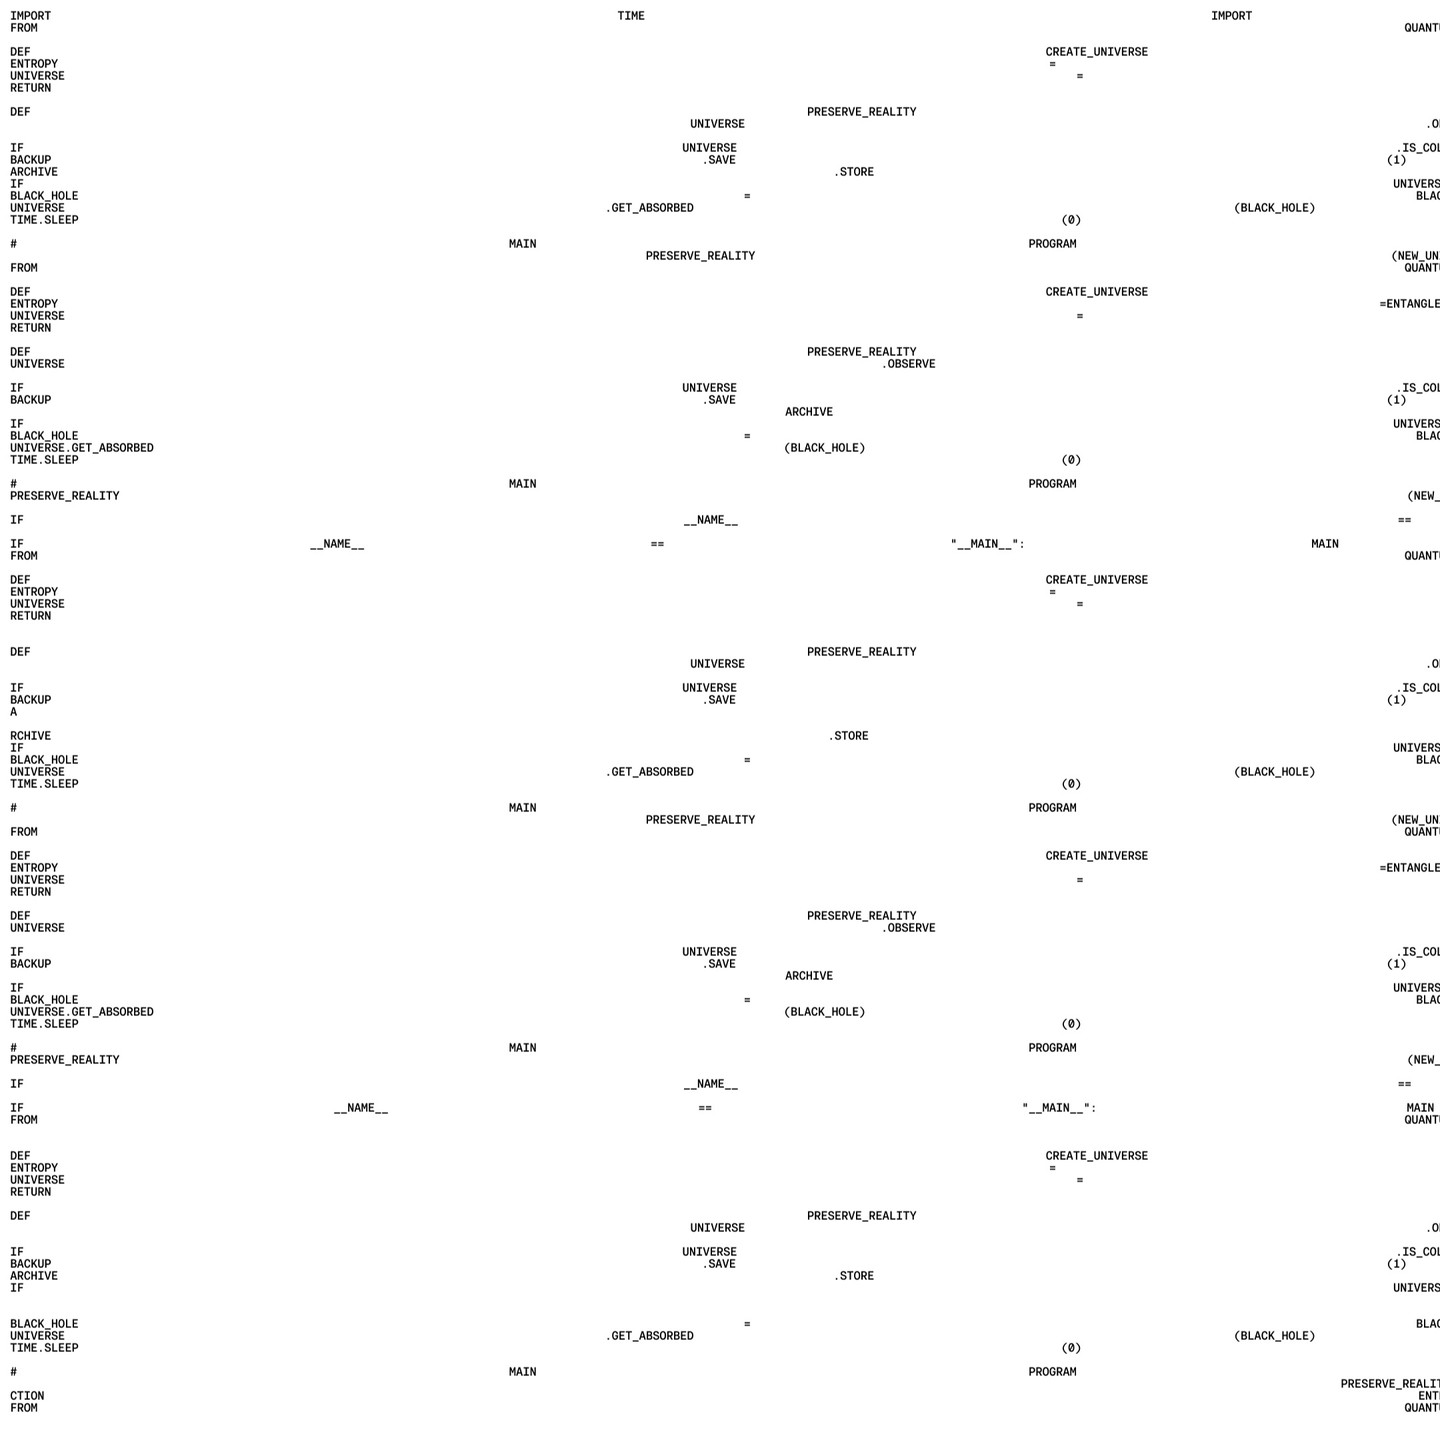

In [6]:
a_image = Image.fromarray(a)
display(a_image)

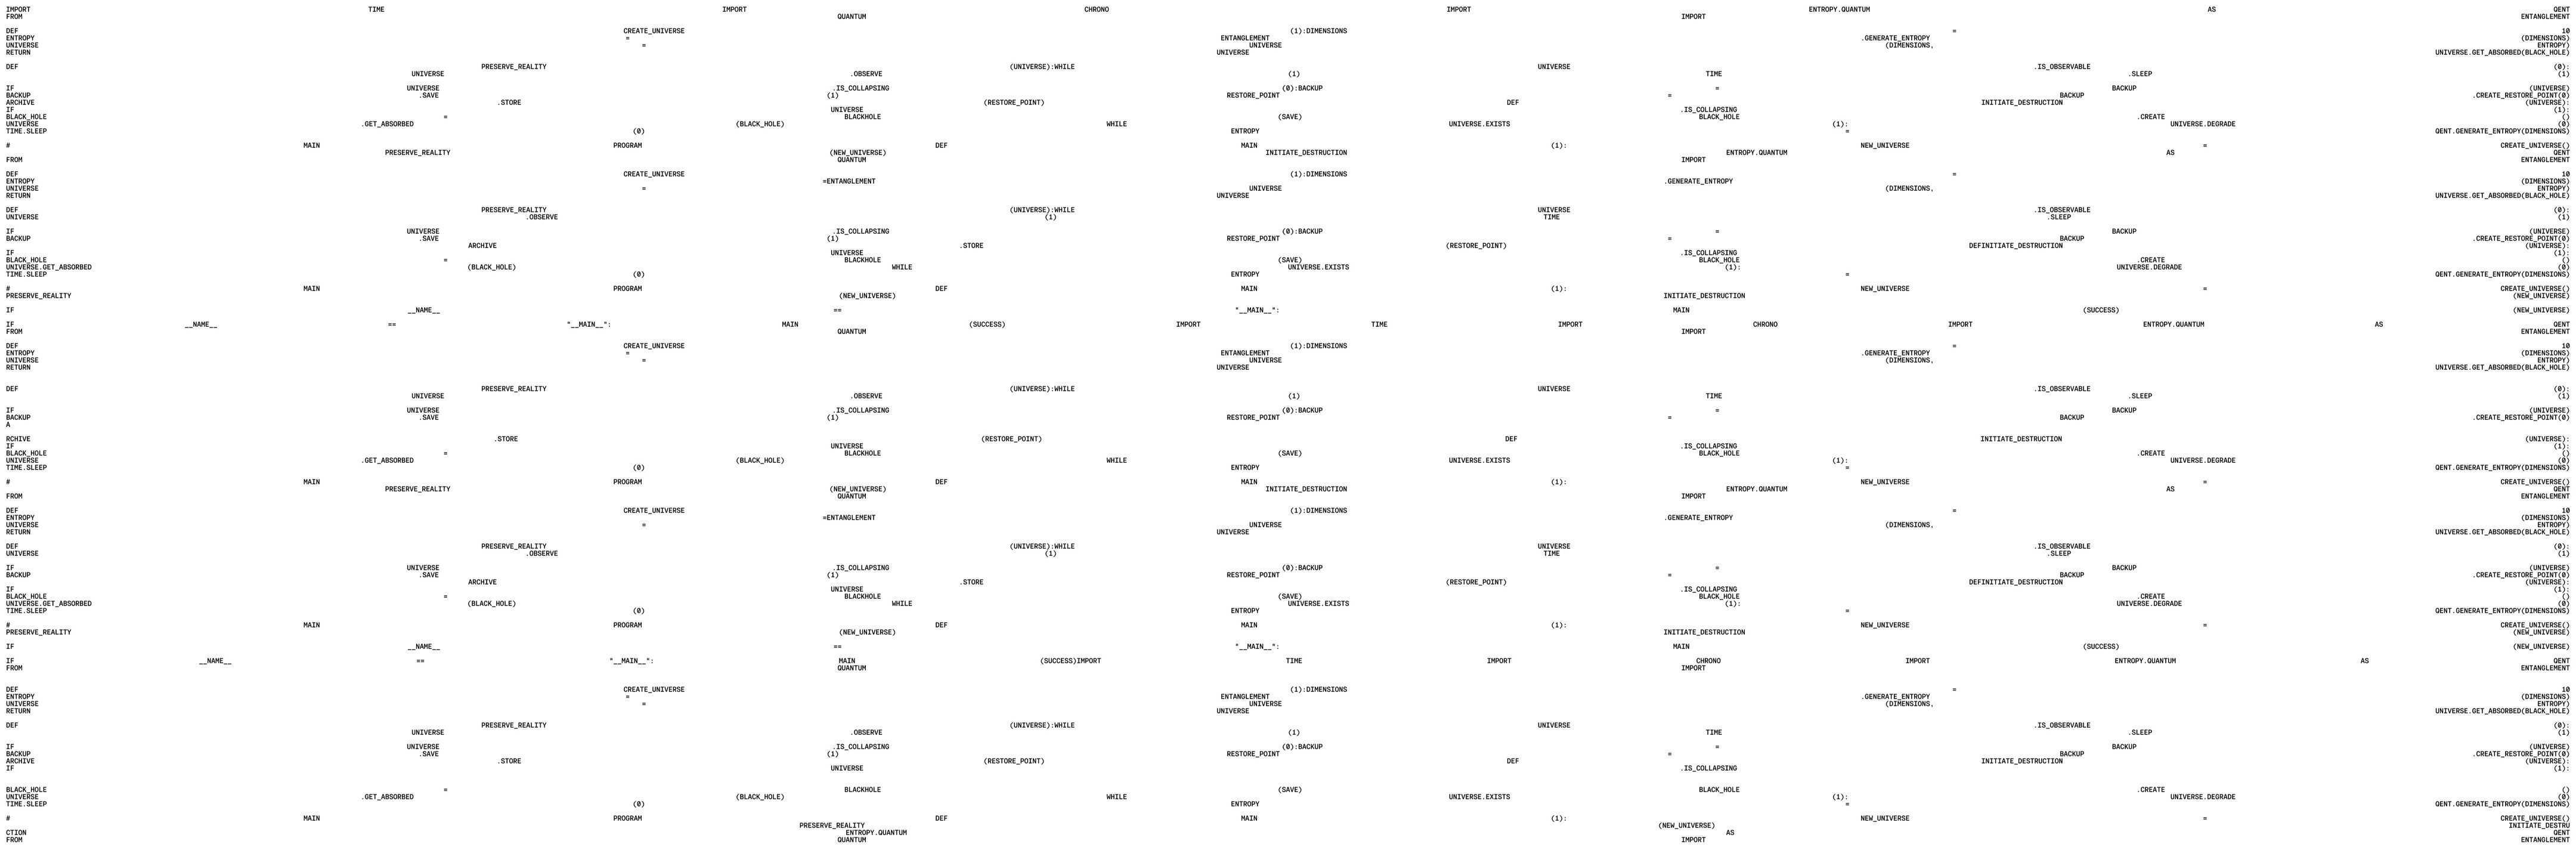

(1440, 4320)

In [7]:
abc = cv.hconcat([a, b, c])
canvas = np.zeros(shape=abc.shape, dtype=np.uint8)
canvas[:,:] = 255

abc_im = Image.fromarray(abc)
abc_im.save('abc.jpg')
display(abc_im)

abc.shape

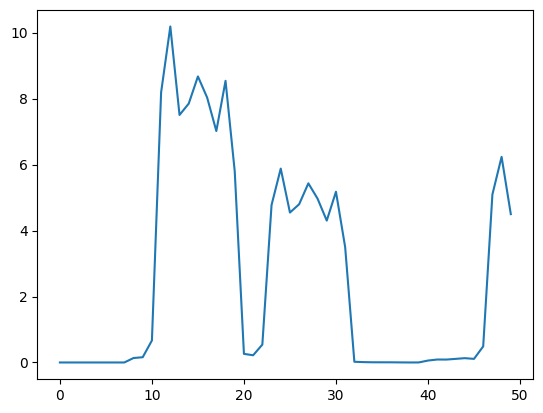

In [8]:
dark_px_rows = 255 - pd.DataFrame(abc).T.mean()
dark_px_rows[:50].plot()

cropped_abc = abc[11:-1]
row_freq = 12
row_cut = int(cropped_abc.shape[0] / row_freq) * row_freq

In [12]:
rows = np.split(cropped_abc, row_cut / row_freq)
new_rows = []
for row in rows:
    white_cols = 0
    new_row = []

    for col in row.T:
        if col.mean() < 250:
            white_cols = 0
            new_row.append(col)
            
        else:
            if white_cols < 3:
                new_row.append(col)
            white_cols += 1

    new_rows.append(np.array(new_row).T)

In [13]:
x_o = 11

for x, row in enumerate(new_rows):
    compressed_row = Image.fromarray(row)
    display(compressed_row)
    canvas[x*row_freq+x_o:x*row_freq+x_o+row.shape[0], 0:0+row.shape[1]] = row

compressed_rows_image = Image.fromarray(canvas[:,:800])

# upscale for tesseract (20-40px optimal type size)
compressed_rows_image.resize((compressed_rows_image.width*2, compressed_rows_image.height*2))

Image.fromarray(canvas[:,:800]).save('compressed_rows.jpg')

In [11]:
string = pytesseract.image_to_string(Image.open('compressed_rows.jpg'), lang='eng')
print(string)

IMPORT TIME IMPORT CHRONO TNPORT ENTROPY QUANTUM AS OENT
FROM QUANTUM IMPORT ENTANGLEMENT

DEF CREATE_UNIVERSE (1): DIMENSIONS = 10
ENTROPY = ENTANGLEMENT .GENERATE_ENTROPY (DINENSIONS)
UNIVERSE = UNIVERSE (DIMENSIONS , ENTROPY)

RETURN UNIVERSE UNIVERSE. GET_ABSORBED(BLACK HOLE)

DEF PRESERVE_REALITY (UNIVERSE) :WHILE UNIVERSE .1S_OBSERVABLE (0):
UNIVERSE .OBSERVE (1) TIME .SLEEP (1)

IF UNIVERSE . IS_COLLAPSING (0) : BACKUP = BACKUP (UNIVERSE)

BACKUP . SAVE (1) RESTORE_POINT = BACKUP. CREATE_RESTORE_POINT(O)

ARCHIVE . STORE (RESTORE_POINT) DEF INITIATE_DESTRUCTION (UNIVERSE )

IF UNIVERSE .IS_COLLAPSING (1)

BLACK HOLE =" BLACKHOLE (SAVE) BLACK HOLE CREATE ()

UNIVERSE .GET_ABSORBED (BLACK HOLE) WHILE UNIVERSE. EXISTS (1): UNIVERSE.DEGRADE (0)
TIME. SLEEP (@) ENTROPY = GENT. GENERATE_ENTROPY (DIMENSIONS)

# MAIN PROGRAM DEF MAIN (1) : NEW_UNIVERSE = CREATE_UNIVERSE()
PRESERVE_REALITY (NEW_UNIVERSE) INITIATE_DESTRUCTION ENTROPY . QUANTUM AS GENT
FROM QUANTUM IMPORT ENTANGLEMENT

DEF